
# PyCaret Regression on California Housing Prices

# Installation

Using local installation (on windows) pycaret version 3.3.2

In [3]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
df = X.copy()
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [5]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data=df, target='target', session_id=42, use_gpu=True, verbose=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [6]:
# compare different models and select the best one
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3168,0.2244,0.4734,0.8322,0.1429,0.1777,1.8800
xgboost,Extreme Gradient Boosting,0.3165,0.2290,0.4781,0.8286,0.1448,0.1772,0.1980
et,Extra Trees Regressor,0.3329,0.2577,0.5071,0.8074,0.1492,0.1837,1.0510
rf,Random Forest Regressor,0.3385,0.2660,0.5153,0.8011,0.1532,0.1896,3.1450
gbr,Gradient Boosting Regressor,0.3706,0.2886,0.5367,0.7844,0.1633,0.2110,2.7310
lr,Linear Regression,0.5316,0.5258,0.7247,0.6073,0.2234,0.3164,0.0160
ridge,Ridge Regression,0.5317,0.5258,0.7247,0.6073,0.2234,0.3164,0.0190
br,Bayesian Ridge,0.5317,0.5258,0.7247,0.6073,0.2234,0.3164,0.0200
dt,Decision Tree Regressor,0.4677,0.5269,0.7254,0.6060,0.2140,0.2554,0.2230
lar,Least Angle Regression,0.5510,0.6300,0.7916,0.5289,0.2366,0.3166,0.0180


In [7]:
tuned = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 13002, number of used features: 8
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Ven

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [8]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [9]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [10]:
# init setup on exp
exp.setup(df, target = 'target', session_id = 123, use_gpu=True, verbose=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

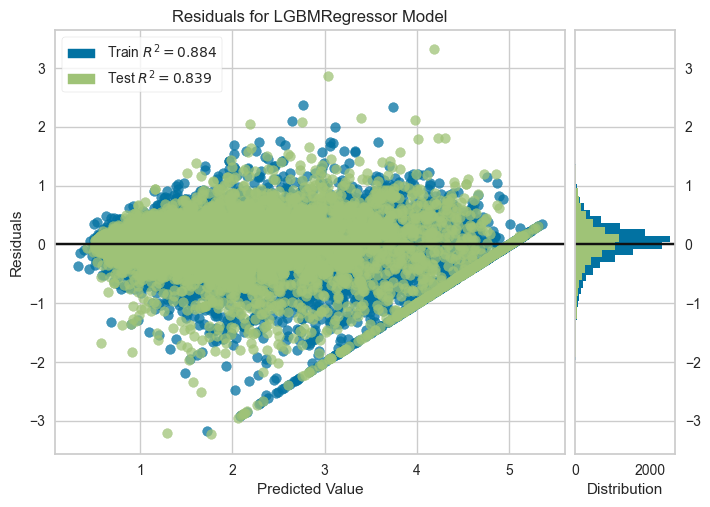

In [11]:
# plot residuals
plot_model(best, plot = 'residuals')

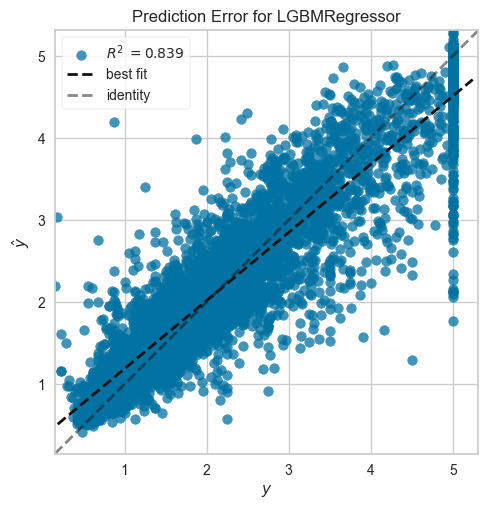

In [12]:
# plot error
plot_model(best, plot = 'error')

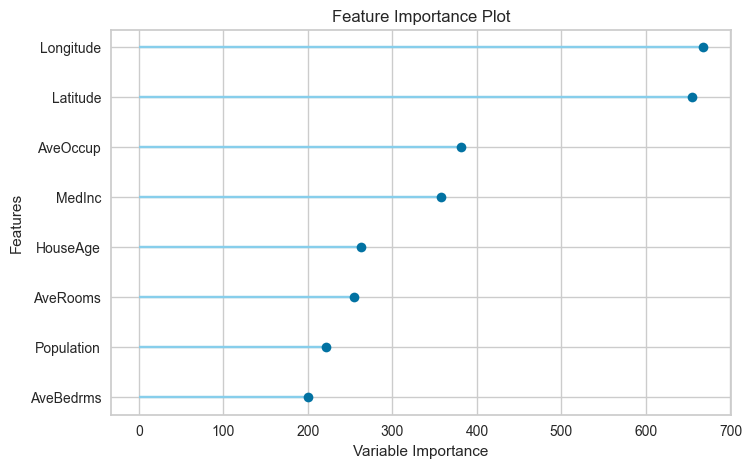

In [13]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
final = finalize_model(tuned)

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [16]:
preds = predict_model(final)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2554,0.1405,0.3748,0.8930,0.1159,0.1474


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


In [17]:
# show predictions df
preds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,prediction_label
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.060001,-119.010002,0.47700,0.557169
3024,2.5313,30.0,5.039383,1.193493,1565.0,2.679795,35.139999,-119.459999,0.45800,0.775702
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.799999,-122.440002,5.00001,4.876829
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.279999,-118.720001,2.18600,2.428261
9814,3.7250,34.0,5.492990,1.028037,1063.0,2.483645,36.619999,-121.930000,2.78000,2.590737


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [18]:
# copy data and drop charges

new_data = df.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prediction_label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.880001,-122.230003,4.082493
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,3.914794
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.849998,-122.239998,3.981559
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.849998,-122.250000,3.305186
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,2.468601


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [20]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  LGBMRegressor(device='gpu', n_jobs=-1, random_state=42))]),
 'my_first_pipeline.pkl')

In [21]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\019101~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                             'AveBedrms', 'Population',
                                             'AveOccup', 'Latitude',
                                             'Longitude'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 LGBMRegressor(device='gpu', n_jobs=-1, random_state=42))])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [22]:
s = setup(data=df, target = 'target', session_id = 123, use_gpu=True, verbose=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [23]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [24]:
# lets access X_train_transformed
get_config('X_train_transformed')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12271,3.5255,21.0,5.694582,1.049261,2174.0,2.677340,34.000000,-117.040001
19605,1.9728,32.0,5.468208,1.144509,624.0,3.606936,37.549999,-121.029999
10600,6.9133,8.0,5.976470,1.026471,862.0,2.535294,33.680000,-117.800003
45,2.6768,52.0,4.335079,1.099476,718.0,1.879581,37.830002,-122.260002
2889,2.5083,52.0,5.373563,1.097701,1325.0,2.538314,35.389999,-118.989998
...,...,...,...,...,...,...,...,...
7763,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.910000,-118.099998
15377,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.369999,-117.239998
17730,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.330002,-121.760002
15725,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.779999,-122.440002


In [25]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [26]:
# init setup with normalize = True
s = setup(df, target = 'target', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [27]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2987,0.2064,0.4540,0.8446,0.1368,0.1673,3.9010
lightgbm,Light Gradient Boosting Machine,0.3172,0.2263,0.4755,0.8298,0.1439,0.1790,0.3150
xgboost,Extreme Gradient Boosting,0.3178,0.2332,0.4826,0.8244,0.1463,0.1790,0.2100
et,Extra Trees Regressor,0.3325,0.2575,0.5072,0.8065,0.1495,0.1849,1.2120
rf,Random Forest Regressor,0.3378,0.2666,0.5162,0.7996,0.1537,0.1910,2.7400
gbr,Gradient Boosting Regressor,0.3729,0.2898,0.5382,0.7823,0.1638,0.2126,1.2030
knn,K Neighbors Regressor,0.4416,0.4269,0.6533,0.6797,0.1916,0.2373,0.0540
dt,Decision Tree Regressor,0.4641,0.5231,0.7227,0.6066,0.2122,0.2521,0.0810
br,Bayesian Ridge,0.5338,0.5338,0.7304,0.5999,0.2247,0.3178,0.0190
lr,Linear Regression,0.5337,0.5339,0.7305,0.5998,0.2246,0.3177,3.3430


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [28]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [29]:
! pip install xgboost lightgbm catboost

You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [30]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2987,0.2064,0.4540,0.8446,0.1368,0.1673,3.1570
lightgbm,Light Gradient Boosting Machine,0.3172,0.2263,0.4755,0.8298,0.1439,0.1790,0.2610
xgboost,Extreme Gradient Boosting,0.3178,0.2332,0.4826,0.8244,0.1463,0.1790,0.1490
et,Extra Trees Regressor,0.3325,0.2575,0.5072,0.8065,0.1495,0.1849,1.1640
rf,Random Forest Regressor,0.3378,0.2666,0.5162,0.7996,0.1537,0.1910,2.9000
gbr,Gradient Boosting Regressor,0.3729,0.2898,0.5382,0.7823,0.1638,0.2126,1.1440
dt,Decision Tree Regressor,0.4641,0.5231,0.7227,0.6066,0.2122,0.2521,0.0990


In [31]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [32]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2987,0.2064,0.4540,0.8446,0.1368,0.1673,3.157
lightgbm,Light Gradient Boosting Machine,0.3172,0.2263,0.4755,0.8298,0.1439,0.1790,0.261
xgboost,Extreme Gradient Boosting,0.3178,0.2332,0.4826,0.8244,0.1463,0.1790,0.149
et,Extra Trees Regressor,0.3325,0.2575,0.5072,0.8065,0.1495,0.1849,1.164
rf,Random Forest Regressor,0.3378,0.2666,0.5162,0.7996,0.1537,0.1910,2.900
gbr,Gradient Boosting Regressor,0.3729,0.2898,0.5382,0.7823,0.1638,0.2126,1.144
dt,Decision Tree Regressor,0.4641,0.5231,0.7227,0.6066,0.2122,0.2521,0.099


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [33]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2987,0.2064,0.4540,0.8446,0.1368,0.1673,3.3020
lightgbm,Light Gradient Boosting Machine,0.3172,0.2263,0.4755,0.8298,0.1439,0.1790,0.3190
xgboost,Extreme Gradient Boosting,0.3178,0.2332,0.4826,0.8244,0.1463,0.1790,0.1410
et,Extra Trees Regressor,0.3325,0.2575,0.5072,0.8065,0.1495,0.1849,1.2220
rf,Random Forest Regressor,0.3378,0.2666,0.5162,0.7996,0.1537,0.1910,2.8530
gbr,Gradient Boosting Regressor,0.3729,0.2898,0.5382,0.7823,0.1638,0.2126,1.1460
knn,K Neighbors Regressor,0.4416,0.4269,0.6533,0.6797,0.1916,0.2373,0.0600
dt,Decision Tree Regressor,0.4641,0.5231,0.7227,0.6066,0.2122,0.2521,0.0970
huber,Huber Regressor,0.5199,0.8292,0.8506,0.3703,0.2218,0.2900,0.1320
lr,Linear Regression,0.5337,0.5339,0.7305,0.5998,0.2246,0.3177,0.0190


In [34]:
# list of top 3 models by MAE
best_mae_models_top3

 LGBMRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)]